---
title: "Intra-annual variability of precipitation"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

In [1]:
#| code-summary: "import stuff"
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from calendar import month_abbr
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)
import urllib.request

In [3]:
#| code-summary: "load data and process it"
df_telaviv = pd.read_csv("TEL_AVIV_READING_monthly.csv",
                         sep=",",
                         parse_dates=['DATE'],
                         index_col='DATE'
                        )
df_london = pd.read_csv("LONDON_HEATHROW_monthly.csv",
                        sep=",",
                        parse_dates=['DATE'],
                        index_col='DATE'
                       )
monthly_london = (df_london['PRCP']
                   .groupby(df_london.index.month)
                   .mean()
                   .to_frame()
                  )
monthly_telaviv = (df_telaviv['PRCP']
                    .groupby(df_telaviv.index.month)
                    .mean()
                    .to_frame()
                  )

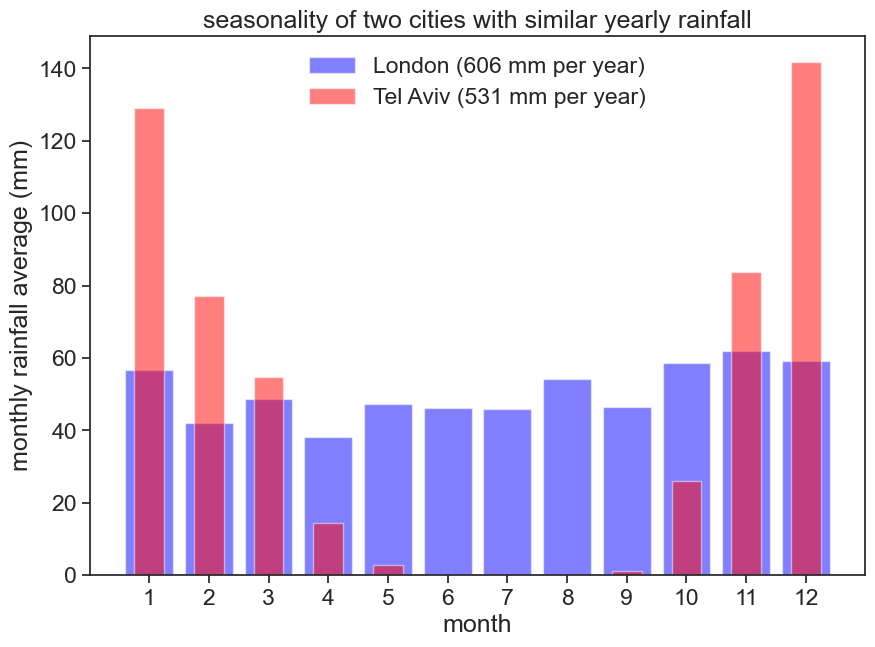

In [4]:
#| code-summary: "plot rainfall distribution"
fig, ax = plt.subplots(figsize=(10,7))

# bar plots
ax.bar(monthly_london.index, monthly_london['PRCP'],
        alpha=0.5, color="blue", label=f"London ({monthly_london.values.sum():.0f} mm per year)")
ax.bar(monthly_telaviv.index, monthly_telaviv['PRCP'],
        alpha=0.5, color="red", width=0.5, label=f"Tel Aviv ({monthly_telaviv.values.sum():.0f} mm per year)")

# axes labels and figure title
ax.set(xlabel='month',
       ylabel='monthly rainfall average (mm)',
       title='seasonality of two cities with similar yearly rainfall',
       xticks=monthly_telaviv.index
      )
ax.legend(loc='upper center', frameon=False);

# save figure
# plt.savefig("hydrology_figures/monthly_tel_aviv_london_bars.png")

## hydrological year

The hydrological year is time period of 12 months for which precipitation totals are measured. The hydrological year is designated by the calendar year in which it **ends**.  

In temperate regions with distinct seasonal patterns, the hydrological year often starts in the fall, when precipitation and streamflow are typically at their lowest levels. This timing ensures that most of the surface runoff during the water year is attributable to the precipitation that fell during the same period.

Let's define the hydrological year for Tel Aviv from 1 October to 30 September.

האם אקלים הגשם שלנו משתנה
<iframe width="560" height="315" src="https://www.youtube.com/embed/v0uNpj03Rk4" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>


We will now shift the months according to Tel Aviv's hydrological year.

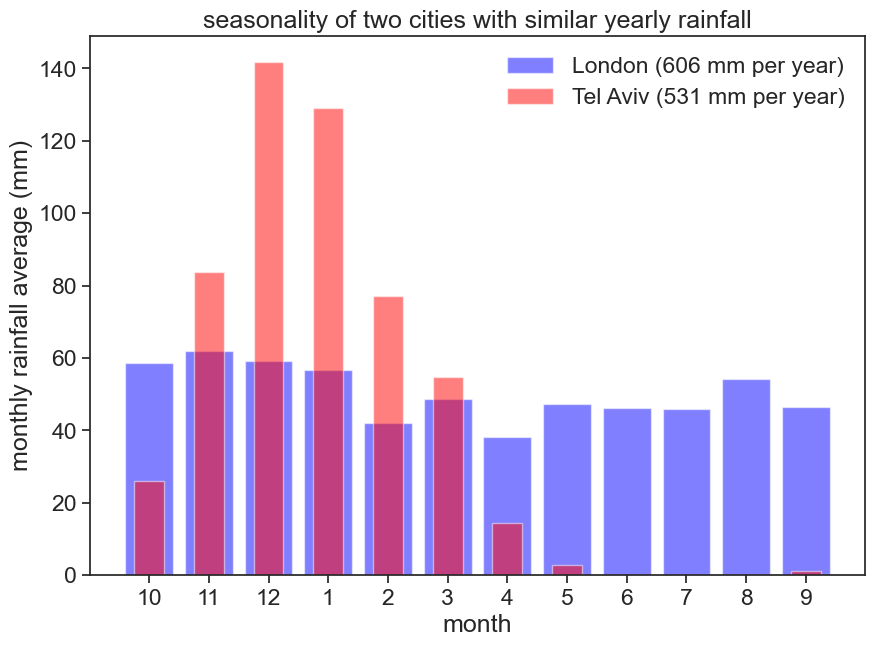

In [5]:
#| code-summary: "plot rainfall distribution according to Tel Aviv's hydrological year"
fig, ax = plt.subplots(figsize=(10,7))
Nroll = 3  # number of months to roll
roll_telaviv = np.roll(monthly_telaviv['PRCP'], Nroll)
roll_london = np.roll(monthly_london['PRCP'], Nroll)
roll_months = np.roll(monthly_london.index, Nroll)
# bar plots
ax.bar(monthly_london.index, roll_london,
        alpha=0.5, color="blue", label=f"London ({monthly_london.values.sum():.0f} mm per year)")
ax.bar(monthly_telaviv.index, roll_telaviv,
        alpha=0.5, color="red", width=0.5, label=f"Tel Aviv ({monthly_telaviv.values.sum():.0f} mm per year)")

# axes labels and figure title
ax.set(xlabel='month',
       ylabel='monthly rainfall average (mm)',
       title='seasonality of two cities with similar yearly rainfall',
       xticks=monthly_london.index,
       xticklabels=roll_months
      )
ax.legend(loc='upper right', frameon=False);

# save figure
# plt.savefig("monthly_tel_aviv_london_bars.png")

Another way of representing this data is with polar coordinates:

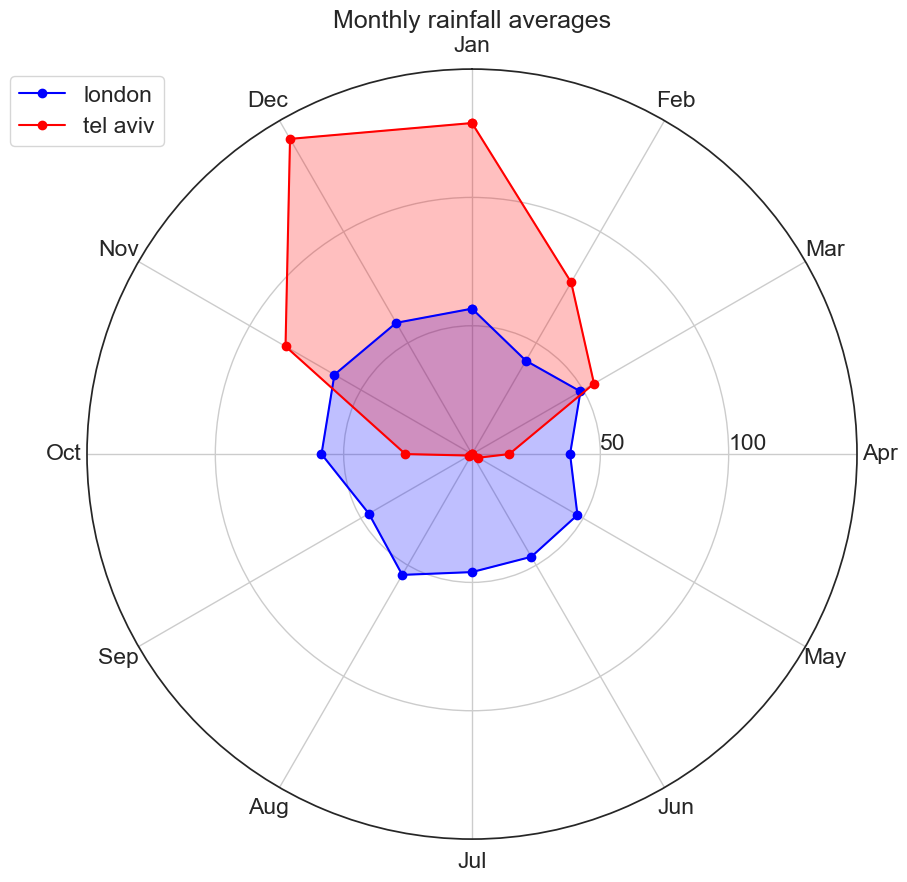

In [6]:
#| code-summary: "plot in polar coordinates"
fig = plt.figure(figsize=(10,10))

# radar chart
ax = fig.add_subplot(111, polar=True)     # make polar plot
ax.set_theta_zero_location("N")           # January on top ("N"orth)
ax.set_theta_direction(-1)                # clockwise direction
ax.set_rlabel_position(90)                # radial labels on the right
ax.set_rticks([50,100])                   # two radial ticks is enough
ax.set_rlim(0,150)                        # limits of r axis
angles=np.linspace(0, 2*np.pi, 12, endpoint=False)       # divide circle into 12 slices
angles=np.append(angles, angles[0])                      # close loop, otherwise lines will be open
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_thetagrids(angles[:-1] * 180/np.pi, month_names)  # relabel angles with month names

# plot london data
stats_london = np.array(monthly_london['PRCP'].values)        # get london data
stats_london = np.append(stats_london, stats_london[0])            # close loop
ax.plot(angles, stats_london, "o-", color='blue', label="london")  # plot line
ax.fill(angles, stats_london, alpha=0.25, color='blue')            # fill

# plot tel aviv data
stats_telaviv = np.array(monthly_telaviv['PRCP'].values)        # get tel aviv data
stats_telaviv = np.append(stats_telaviv, stats_telaviv[0])           # close loop
ax.plot(angles, stats_telaviv, "o-", color='red', label="tel aviv")  # plot line
ax.fill(angles, stats_telaviv, alpha=0.25, color='red')              # fill

ax.set_title("Monthly rainfall averages")
ax.legend(loc=(-0.1,0.9));  # legend at x=-0.2 so it doesn't overlap with graph

# save figure
# plt.savefig("radar_chart_tel_aviv_london.png")

## Seasonality Index

Sources: @walsh_lawler, @walsh1981rainfall

$\langle{P}\rangle=$ mean annual precipitation  
$m_i=$ precipitation mean for month $i$  

$$
SI = \displaystyle \frac{1}{\langle{P}\rangle} \sum_{n=1}^{n=12} \left| m_i - \frac{\langle{P}\rangle}{12} \right|
$$

| $SI$ | Precipitation Regime |
| --- | --- |
| <0.19 | Precipitation spread throughout the year |
| 0.20-0.39	 | Precipitation spread throughout the year, but with a definite wetter season |
| 0.40-0.59	 | Rather seasonal with a short dry season |
| 0.60-0.79	 | Seasonal |
| 0.80-0.99	 | Marked seasonal with a long dry season |
| 1.00-1.19		 | Most precipitation in <3 months |

Let's write some code to calculate the SI for Tel Aviv and London.

In [7]:
#| code-summary: "Show/hide the code"

def walsh_index(df):
    m = df["PRCP"].values
    R = m.sum()
    SI = np.sum(np.abs(m-R/12)) / R
    return SI

london_index = walsh_index(monthly_london)
telaviv_index = walsh_index(monthly_telaviv)
print("Seasonality index (Walsh and Lawler, 1981)")
print(f"London: {london_index:.2f}")
print(f"Tel Aviv: {telaviv_index:.2f}")

Seasonality index (Walsh and Lawler, 1981)
London: 0.13
Tel Aviv: 1.00


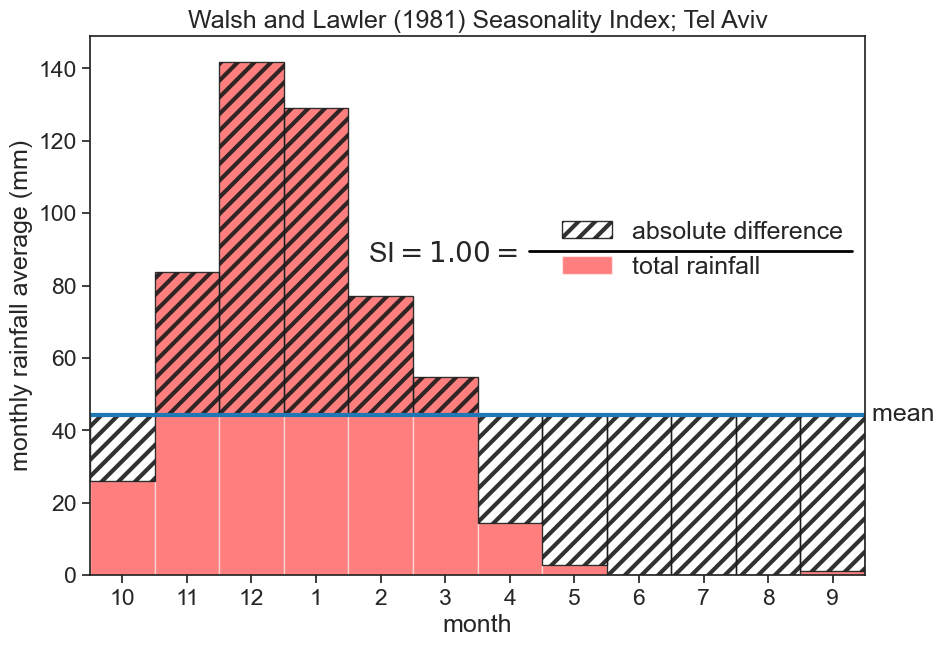

In [8]:
fig, ax = plt.subplots(figsize=(10,7))

plt.rcParams['hatch.linewidth'] = 3
roll_telaviv
xlim = [1, 13]
total_telaviv = np.sum(roll_telaviv)
ax.plot(xlim, [total_telaviv/12]*2, color="tab:blue", linewidth=3)
ax.set_xlim(xlim)

shaded = roll_telaviv - total_telaviv/12
months = monthly_telaviv.index
ax.bar(months, shaded,
       alpha=0.9, color="None", width=1,
       hatch="//", edgecolor='k',
       align='edge', bottom=total_telaviv/12,
       label=f"absolute difference")

ax.bar(months, roll_telaviv,
       alpha=0.5, color="red", width=1,
       align='edge',
       label=f"total rainfall", zorder=0)

ax.text(5.3, 86.5, r"SI$=1.00=$", fontsize=20)
ax.text(xlim[-1], total_telaviv/12, " mean", va="center")
ax.plot([7.8, 12.8], [89.5]*2, color="black", lw=2)
# axes labels and figure title
ax.set(xlabel='month',
       ylabel='monthly rainfall average (mm)',
       title='Walsh and Lawler (1981) Seasonality Index; Tel Aviv',
       xticks=np.arange(1.5,12.6,1),
       xticklabels=roll_months,
      )

plt.legend(loc='upper right', frameon=False, bbox_to_anchor=(1, 0.7),
           fontsize=18);

# save figure
# plt.savefig("si_walsh_telaviv.png")

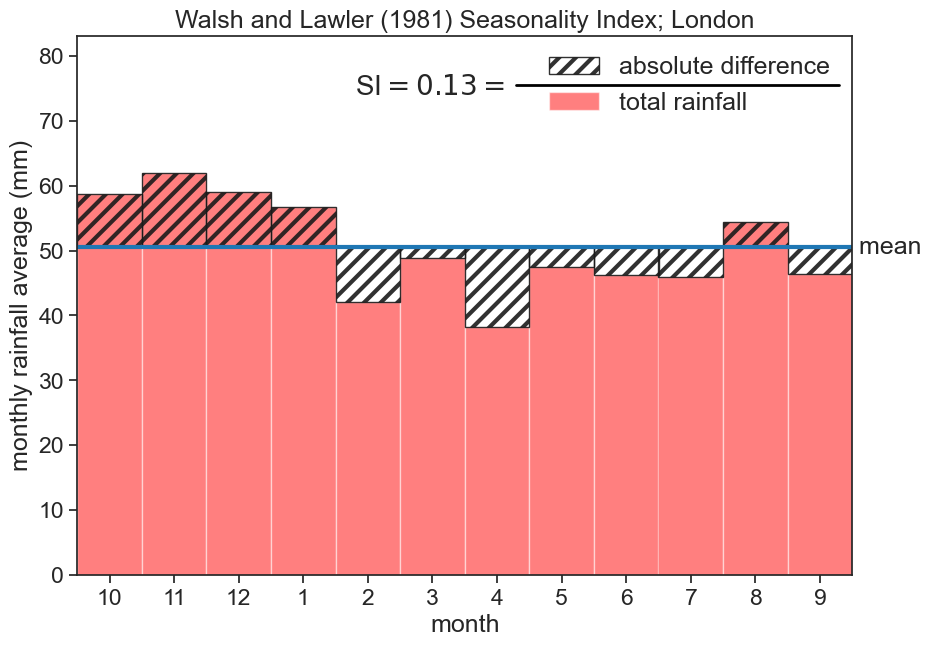

In [9]:
fig, ax = plt.subplots(figsize=(10,7))

plt.rcParams['hatch.linewidth'] = 3
xlim = [1, 13]
total_london = np.sum(roll_london)
ax.plot(xlim, [total_london/12]*2, color="tab:blue", linewidth=3)
ax.set_xlim(xlim)

shaded = roll_london - total_london/12
months = monthly_london.index
ax.bar(months, shaded,
       alpha=0.9, color="None", width=1,
       hatch="//", edgecolor='k',
       align='edge', bottom=total_london/12,
       label=f"absolute difference")

ax.bar(months, roll_london,
       alpha=0.5, color="red", width=1,
       align='edge',
       label=f"total rainfall", zorder=0)


ax.text(5.3, 74, r"SI$=0.13=$", fontsize=20)
ax.text(xlim[-1], total_london/12, " mean", va="center")
ax.plot([7.8, 12.8], [75.5]*2, color="black", lw=2)
# axes labels and figure title
ax.set(xlabel='month',
       ylabel='monthly rainfall average (mm)',
       title='Walsh and Lawler (1981) Seasonality Index; London',
       xticks=np.arange(1.5,12.6,1),
       xticklabels=roll_months,
       ylim=[0,83],
      )

plt.legend(loc='upper right', frameon=False, bbox_to_anchor=(1, 1.005),
           fontsize=18);

# save figure
# plt.savefig("si_walsh_telaviv.png")

::: {.callout-note collapse="true" icon=false}
## {{< iconify fa question-circle-o >}} What is greatest possible value for the Walsh and Lawler seasonality index?

This must be the case when all the rainfall in concentrated in only one month of the year.

<details>
<summary>calculation</summary>
Without loss of generality, assume that all the rain in the year ($P$) is in January: $m_1=P$ and $m_i=0$ for other months.

$$
\begin{split}
SI &= \frac{1}{P} \sum_{n=1}^{n=12} \left| m_i - \frac{\langle{P}\rangle}{12} \right| \\
   &= \frac{1}{P} \left| P - \frac{P}{12}  \right| + \frac{1}{P} \sum_{n=2}^{n=12} \left| 0 - \frac{P}{12} \right| \\
   &= \frac{11}{12} + 11\cdot \frac{1}{12} \\
   &= \frac{11}{6} \\
   &= 1.83
\end{split}
$$


</details>
:::


::: {.callout-note collapse="true" icon=false}
## {{< iconify fa question-circle-o >}} Can you think of a better seasonality index?

Think of possible problems with Walsh and Lawler's index, then try to fix them :)
:::

::: {.callout-note collapse="true" icon=false}
## {{< iconify fa question-circle-o >}} What would happen to the index value if we were to randomly shuffle the months?
:::